In [1]:
## Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import tifffile as tiff
import sys
import os
sys.path.append(os.path.abspath("../.."))
from src.preprocessing.preprocessing_functions import *

# Loading Data and Reshaping
#### Note: everything is repeated for the 3 Bioreplicates (BR1, BR2, BR3)

In [2]:
# Load all track data
track_data_br1 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR1_tracks_0606224.csv') 
track_data_br2 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR2_tracks_0606224.csv') 
track_data_br3 = pd.read_csv('/Users/inescunha/Documents/GitHub/explanation/ALM272_BR3_tracks_060624.csv') 

filtered_track_br1, y_train_br1 = process_track_data(track_data_br1)
filtered_track_br2, y_train_br2 = process_track_data(track_data_br2)
filtered_track_br3, y_train_br3 = process_track_data(track_data_br3)

Filtered data shape (478, 1080, 19) (478,)
Filtered data shape (493, 1080, 19) (493,)
Filtered data shape (856, 1080, 19) (856,)


In [ ]:
track_data_br1[track_data_br1['unique_track_id'] == 102]

,source_spot,target_spot,edge_time,xpos,ypos,tpos,ROI_nb,cell_av_FRET,CFP_av,YFP_av,...,Aspect_Ratio,cell_av_FRET_norm,unique_track_id,trackmate_track_id,iscorrect,fate,fov,apoptosis_time,mitosis_time,daughter
91753,3652443,3652252,120.0,491.754988,251.819559,1,56.0,NaN,309.240843,344.579167,...,1.643393,NaN,103,43,1,2,pos8,0,797,1
91754,3652252,3652315,360.0,491.744232,251.444751,2,56.0,1.200134,298.522243,358.266772,...,1.698880,1.070606,103,43,1,2,pos8,0,797,1
91755,3652315,3652379,600.0,491.583363,251.648190,3,56.0,1.192029,300.613703,358.340366,...,1.721987,1.063376,103,43,1,2,pos8,0,797,1
91756,3652379,3652507,840.0,491.395196,251.498133,4,57.0,1.086665,327.233770,355.593473,...,1.680514,0.969383,103,43,1,2,pos8,0,797,1
91757,3652507,3652699,1080.0,491.576283,251.510618,5,56.0,1.098509,336.355284,369.489198,...,1.647706,0.979948,103,43,1,2,pos8,0,797,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92824,3724259,3724398,258120.0,497.447002,282.820323,1076,66.0,1.131560,355.235022,401.969650,...,1.742837,1.009432,103,43,1,2,pos8,0,797,1
92825,3724398,3724190,258360.0,497.348633,282.874608,1077,67.0,1.095957,379.053989,415.426946,...,1.669996,0.977672,103,43,1,2,pos8,0,797,1
92826,3724190,3724534,258600.0,497.137834,282.725183,1078,68.0,1.076852,376.643371,405.589045,...,1.741337,0.960629,103,43,1,2,pos8,0,797,1
92827,3724534,3724466,258840.0,497.260230,282.897781,1079,63.0,1.141552,360.740397,411.804081,...,1.760395,1.018347,103,43,1,2,pos8,0,797,1


In [3]:
sub_size = (20, 20)

# BR1
images_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=False, FRET=False)
segmentations_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=True, FRET=False)
fret_br1, y_train_br1_ = process_all_fovs(track_data_br1, sub_size, bioreplicate = "BR1", segmentation=True, FRET=True)

# BR2
images_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=False, FRET=False)
segmentations_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=True, FRET=False)
fret_br2, y_train_br2_ = process_all_fovs(track_data_br2, sub_size, bioreplicate = "BR2", segmentation=True, FRET=True)

# BR3
images_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=False, FRET=False)
segmentations_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=True, FRET=False)
fret_br3, y_train_br3_ = process_all_fovs(track_data_br3, sub_size, bioreplicate = "BR3", segmentation=True, FRET=True)

print("BR1 Images shape:", images_br1.shape, "BR2:", images_br2.shape, "BR3:", images_br3.shape)
print("BR1 tracks shape:", filtered_track_br1.shape, "BR2:", filtered_track_br2.shape, "BR3:", filtered_track_br3.shape)

[ 1  1  1 ... 20 20 20]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G001_0001.tif']
[21 21 21 ... 39 39 39]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G002_0001.tif']
[40 40 40 ... 59 59 59]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B03_G003_0001.tif']
[ 60  60  60 ... 122 122 122]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G004_0001.tif']
[123 123 123 ... 161 161 161]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G005_0001.tif']
[162 162 162 ... 203 203 203]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B04_G006_0001.tif']
[204 204 204 ... 296 296 296]
bioreplicate: BR1
['/Users/inescunha/Documents/GitHub/explanation/BR1_Images/Tiff/ALM272_B05_G007_0001.tif']
[297 297 297 ... 375 375 375]
bioreplicate: B

In [4]:
np.save("images_br1.npy", images_br1)
np.save("segmentations_br1.npy", segmentations_br1)
np.save("fret_br1.npy", fret_br1)
np.save("images_br2.npy", images_br2)
np.save("segmentations_br2.npy", segmentations_br2)
np.save("fret_br2.npy", fret_br2)
np.save("images_br3.npy", images_br3)
np.save("segmentations_br3.npy", segmentations_br3)
np.save("fret_br3.npy", fret_br3)
np.save("y_train_br1.npy", y_train_br1)
np.save("y_train_br2.npy", y_train_br2)
np.save("y_train_br3.npy", y_train_br3)

In [17]:
filtered_track_br1.shape

(478, 1080, 19)

In [18]:
y_train_br1_[102]

2

In [9]:
filtered_track_br1[102]

array([[103.       , 491.75497  , 251.81956  , ...,   1.6433928,
        797.       ,   2.       ],
       [103.       , 491.74423  , 251.44475  , ...,   1.6988797,
        797.       ,   2.       ],
       [103.       , 491.58337  , 251.6482   , ...,   1.7219871,
        797.       ,   2.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]], dtype=float32)

In [8]:
np.where(filtered_track_br1[:,0,0]==103)

(array([102]),)

# Processing
#### From this point on, cells on the raw images, segmentation, fret and tracks will be processed equally (Outlier remover).

In [3]:
images_br1 = np.load("images_br1.npy")
segmentations_br1 = np.load("segmentations_br1.npy")
fret_br1 = np.load("fret_br1.npy")
images_br2 = np.load("images_br2.npy")
segmentations_br2 = np.load("segmentations_br2.npy")
fret_br2 = np.load("fret_br2.npy")
images_br3 = np.load("images_br3.npy")
segmentations_br3 = np.load("segmentations_br3.npy")
fret_br3 = np.load("fret_br3.npy")
y_train_br1_ = np.load("y_train_br1.npy")
y_train_br2_ = np.load("y_train_br2.npy")
y_train_br3_ = np.load("y_train_br3.npy")


## 1. Removing cells from edges of FOV

In [4]:
#### Removing cells in edges of the FOV ####

indexes_to_remove_br1 = edge_indexes(images_br1)

images_br1_no_edges = np.delete(images_br1, indexes_to_remove_br1, axis=0)
y_train_br1_no_edges = np.delete(y_train_br1_, indexes_to_remove_br1)
segmentations_br1_no_edges = np.delete(segmentations_br1, indexes_to_remove_br1, axis=0)
filtered_track_br1_no_edges = np.delete(filtered_track_br1, indexes_to_remove_br1, axis=0)

print("New dataset shape:", images_br1_no_edges.shape, "Segmentations shape:", segmentations_br1_no_edges.shape, "tracks:", filtered_track_br1_no_edges.shape, "y train:", y_train_br1_no_edges.shape)


New dataset shape: (452, 1080, 3, 20, 20) Segmentations shape: (452, 1080, 20, 20) tracks: (452, 1080, 19) y train: (452,)


In [5]:

indexes_to_remove_br2 = edge_indexes(images_br2)

images_br2_no_edges = np.delete(images_br2, indexes_to_remove_br2, axis=0)
y_train_br2_no_edges = np.delete(y_train_br2_, indexes_to_remove_br2)
segmentations_br2_no_edges = np.delete(segmentations_br2, indexes_to_remove_br2, axis=0)
filtered_track_br2_no_edges = np.delete(filtered_track_br2, indexes_to_remove_br2, axis=0)

print("New dataset shape:", images_br2_no_edges.shape, "Segmentations shape:", segmentations_br2_no_edges.shape, "tracks:", filtered_track_br2_no_edges.shape, "y train:", y_train_br2_no_edges.shape)


New dataset shape: (473, 1080, 3, 20, 20) Segmentations shape: (473, 1080, 20, 20) tracks: (473, 1080, 19) y train: (473,)


In [6]:
indexes_to_remove_br3 = edge_indexes(images_br3)

images_br3_no_edges = np.delete(images_br3, indexes_to_remove_br3, axis=0)
y_train_br3_no_edges = np.delete(y_train_br3_, indexes_to_remove_br3)
segmentations_br3_no_edges = np.delete(segmentations_br3, indexes_to_remove_br3, axis=0)
filtered_track_br3_no_edges = np.delete(filtered_track_br3, indexes_to_remove_br3, axis=0)

print("New dataset shape:", images_br3_no_edges.shape, "Segmentations shape:", segmentations_br3_no_edges.shape, "tracks:", filtered_track_br3_no_edges.shape, "y train:", y_train_br3_no_edges.shape)

New dataset shape: (804, 1080, 4, 20, 20) Segmentations shape: (804, 1080, 20, 20) tracks: (804, 1080, 19) y train: (804,)


In [ ]:
np.save("images_br1_no_edges.npy", images_br1_no_edges)
np.save("segmentations_br1_no_edges.npy", segmentations_br1_no_edges)
np.save("y_train_br1_no_edges.npy", y_train_br1_no_edges)
np.save("filtered_track_br1_no_edges.npy", filtered_track_br1_no_edges)
np.save("images_br2_no_edges.npy", images_br2_no_edges)
np.save("segmentations_br2_no_edges.npy", segmentations_br2_no_edges)
np.save("y_train_br2_no_edges.npy", y_train_br2_no_edges)
np.save("filtered_track_br2_no_edges.npy", filtered_track_br2_no_edges)
np.save("images_br3_no_edges.npy", images_br3_no_edges)

In [8]:
np.save("segmentations_br3_no_edges.npy", segmentations_br3_no_edges)
np.save("y_train_br3_no_edges.npy", y_train_br3_no_edges)
np.save("filtered_track_br3_no_edges.npy", filtered_track_br3_no_edges)


## 2. Overimpose images with segmentations to remove background noise

In [9]:
overimposed_br1 = overimpose(images_br1_no_edges, segmentations_br1_no_edges)
# overimposed_br2 = overimpose(images_br2_no_edges, segmentations_br2_no_edges)
# overimposed_br3 = overimpose(images_br3_no_edges, segmentations_br3_no_edges)

In [7]:
overimposed_br2 = overimpose(images_br2_no_edges, segmentations_br2_no_edges)

In [8]:
overimposed_br3 = overimpose(images_br3_no_edges, segmentations_br3_no_edges)

## 3. Removal of daughter cells (data points without tpos 1, 2 or 3)

In [9]:
##### Removing daughter cells ####
# We can remove the daughter cells by removing the data points that do not have the time points 1,2 or 3 (which means they started their "lifetimes" somewhere in the middle of the time series, meaning they could only be daughter cells)

indexes_daughter_br1 = daughter_indexes(filtered_track_br1_no_edges)
print("Indices of cells without time points 1, 2, and 3 in `tpos`:", indexes_daughter_br1)
br1_mother_tracks = np.delete(filtered_track_br1_no_edges, indexes_daughter_br1, axis=0)
br1_mother_images = np.delete(overimposed_br1, indexes_daughter_br1, axis=0)
br1_y_train = np.delete(y_train_br1_no_edges, indexes_daughter_br1, axis=0)


Indices of cells without time points 1, 2, and 3 in `tpos`: [10, 15, 18, 36, 78, 81, 85, 96, 99, 105, 110, 111, 139, 148, 152, 153, 156, 157, 170, 179, 182, 185, 186, 187, 190, 191, 195, 198, 203, 220, 222, 228, 232, 241, 245, 247, 270, 285, 292, 302, 304, 306, 326, 329, 359, 371, 378, 391, 398, 406, 409, 412, 418, 436, 443, 445, 446]


In [10]:
indexes_daughter_br2 = daughter_indexes(filtered_track_br2_no_edges)
print("Indices of cells without time points 1, 2, and 3 in `tpos`:", indexes_daughter_br2)
br2_mother_tracks = np.delete(filtered_track_br2_no_edges, indexes_daughter_br2, axis=0)
br2_mother_images = np.delete(overimposed_br2, indexes_daughter_br2, axis=0)
br2_y_train = np.delete(y_train_br2_no_edges, indexes_daughter_br2, axis=0)

Indices of cells without time points 1, 2, and 3 in `tpos`: [3, 5, 11, 28, 30, 33, 36, 46, 65, 72, 74, 76, 80, 82, 83, 88, 89, 92, 94, 105, 108, 109, 110, 119, 135, 140, 152, 156, 162, 182, 189, 194, 209, 232, 233, 263, 265, 273, 274, 275, 281, 283, 299, 304, 305, 307, 318, 325, 329, 333, 342, 369, 374, 395, 397, 402, 427, 429, 432, 439, 443, 458, 465]


In [11]:
indexes_daughter_br3 = daughter_indexes(filtered_track_br3_no_edges)
print("Indices of cells without time points 1, 2, and 3 in `tpos`:", indexes_daughter_br3)
br3_mother_tracks = np.delete(filtered_track_br3_no_edges, indexes_daughter_br3, axis=0)
br3_mother_images = np.delete(overimposed_br3, indexes_daughter_br3, axis=0)
br3_y_train = np.delete(y_train_br3_no_edges, indexes_daughter_br3, axis=0)

print(br1_mother_images.shape, br2_mother_images.shape, br3_mother_images.shape)

Indices of cells without time points 1, 2, and 3 in `tpos`: [40, 63, 71, 77, 107, 116, 118, 155, 158, 162, 172, 174, 178, 180, 183, 188, 191, 195, 199, 204, 206, 212, 214, 225, 237, 239, 243, 246, 256, 262, 266, 277, 279, 287, 290, 307, 308, 309, 336, 346, 361, 368, 387, 389, 403, 409, 425, 426, 438, 456, 460, 463, 479, 498, 500, 513, 527, 536, 553, 554, 557, 571, 574, 580, 631, 637, 641, 667, 680, 695, 697, 701, 707, 712, 713, 718, 725, 737, 747, 750, 752, 773, 779, 782, 791, 794, 799]
(395, 1080, 2, 20, 20) (410, 1080, 2, 20, 20) (717, 1080, 2, 20, 20)


In [12]:
### save from here!!! ###
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/br1_mother_images.npy", br1_mother_images)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/br2_mother_images.npy", br2_mother_images)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/br3_mother_images.npy", br3_mother_images)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br1_mother_tracks.npy", br1_mother_tracks)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br2_mother_tracks.npy", br2_mother_tracks)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br3_mother_tracks.npy", br3_mother_tracks)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br1_y_train.npy", br1_y_train)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br2_y_train.npy", br2_y_train)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br3_y_train.npy", br3_y_train)

## 4. Remove daughter trace from the same track as mother 

(This is done in the cases where trackmate associated the same ID to the mother and correspondent daughter, we still need to remove the daughter from the mother track)

In [2]:
br1_mother_images = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/images/br1_mother_images.npy")
br2_mother_images = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/images/br2_mother_images.npy")
br3_mother_images = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/images/br3_mother_images.npy")
br1_mother_tracks = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br1_mother_tracks.npy")
br2_mother_tracks = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br2_mother_tracks.npy")
br3_mother_tracks = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/br3_mother_tracks.npy")
br1_y_train = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br1_y_train.npy")
br2_y_train = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br2_y_train.npy")
br3_y_train = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/br3_y_train.npy")

In [7]:
def daughter_trace_removal(tabular_data, image_data):
    """
    Removes information from daughter cells in both tabular and image data.
    
    - For each cell (row) in tabular_data, it finds the first zero in column 4, **ignoring the first time point**.
    - From that time point onward, it sets all values in that row to zero.
    - The same index is used to set corresponding images in image_data to zero.

    Args:
        tabular_data (numpy.ndarray): A 3D matrix of shape (cells, time, features).
        image_data (numpy.ndarray): A 5D matrix of shape (cells, time, channels, height, width).

    Returns:
        tuple: Processed (tabular_data, image_data) with zeroed-out values from the determined index onward.
    """
    processed_tabular = tabular_data.copy()
    processed_images = image_data.copy()
    
    for cell_idx, cell in enumerate(processed_tabular):
        # Ignore the first time point and find the first zero in the 4th column (index 3)
        feature_values = cell[1:, 4]  # Start from the second time point
        first_zero_index = np.argmax(feature_values == 0) + 1 if np.any(feature_values == 0) else None  # Shift by 1
        
        # If a zero is found, zero out both tabular and image data from that time point onward
        if first_zero_index is not None:
            processed_tabular[cell_idx, first_zero_index:, :] = 0
            processed_images[cell_idx, first_zero_index:, :, :, :] = 0  # Zeroing corresponding images
    
    return processed_tabular, processed_images

In [8]:
processed_br1_mother_tracks, processed_br1_images = daughter_trace_removal(br1_mother_tracks, br1_mother_images)
processed_br2_mother_tracks, processed_br2_images = daughter_trace_removal(br2_mother_tracks, br2_mother_images)
processed_br3_mother_tracks, processed_br3_images = daughter_trace_removal(br3_mother_tracks, br3_mother_images)

In [ ]:
processed_br1_mother_tracks[]

(395, 1080, 19)

In [35]:
track_data_br1[track_data_br1['unique_track_id'] == 103][710:720]

,source_spot,target_spot,edge_time,xpos,ypos,tpos,ROI_nb,cell_av_FRET,CFP_av,YFP_av,...,Aspect_Ratio,cell_av_FRET_norm,unique_track_id,trackmate_track_id,iscorrect,fate,fov,apoptosis_time,mitosis_time,daughter
92463,3699942,3700158,170520.0,498.080033,245.015297,711,68.0,1.232500,405.196542,499.404799,...,1.138690,1.099478,103,43,1,2,pos8,0,797,1
92464,3700158,3700014,170760.0,498.048645,245.091159,712,72.0,1.230479,398.189151,489.963549,...,1.170095,1.097676,103,43,1,2,pos8,0,797,1
92465,3700014,3700087,171000.0,498.138946,244.928732,713,71.0,1.230357,384.732324,473.357934,...,1.115231,1.097566,103,43,1,2,pos8,0,797,1
92466,3700087,3700231,171240.0,498.462780,244.637087,714,72.0,1.214696,404.691441,491.577053,...,1.120890,1.083596,103,43,1,2,pos8,0,797,1
92467,3700231,3700372,171480.0,498.574125,244.508427,715,71.0,1.245764,373.336690,465.089259,...,1.113167,1.111310,103,43,1,2,pos8,0,797,1
92468,3700372,3700302,171720.0,498.398625,244.636050,716,75.0,1.312019,375.212172,492.285507,...,1.185505,1.170415,103,43,1,2,pos8,0,797,1
92469,3700302,3700443,171960.0,498.456646,244.334124,717,73.0,1.466444,362.123747,531.034370,...,1.305648,1.308174,103,43,1,2,pos8,0,797,1
92470,3700443,3700514,172200.0,498.565389,244.441725,718,74.0,1.502754,343.237770,515.801989,...,1.211799,1.340564,103,43,1,2,pos8,0,797,1
92471,3700514,3700658,172440.0,498.741245,244.956366,719,70.0,NaN,323.273262,497.336311,...,1.344850,NaN,103,43,1,2,pos8,0,797,1
92472,3700658,3700586,172680.0,498.441845,245.591462,720,72.0,NaN,314.345617,501.724244,...,1.353828,NaN,103,43,1,2,pos8,0,797,1


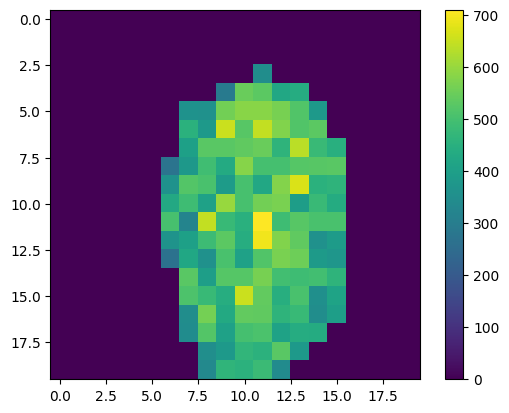

In [9]:
plt.imshow(processed_br1_images[89, 0, 0, :, :])
plt.colorbar()

In [10]:
processed_br1_mother_tracks[:,0,0]

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  12.,
        13.,  14.,  15.,  18.,  19.,  21.,  22.,  23.,  24.,  25.,  26.,
        27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,
        39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,
        50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
        63.,  64.,  65.,  66.,  67.,  69.,  70.,  71.,  72.,  73.,  74.,
        75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  84.,  85.,  87.,
        88.,  89.,  91.,  92.,  93.,  94.,  95.,  96.,  98.,  99., 100.,
       101., 103., 104., 106., 107., 108., 109., 110., 112., 113., 114.,
       115., 118., 119., 120., 121., 123., 124., 125., 126., 127., 128.,
       129., 130., 131., 132., 133., 134., 135., 136., 137., 138., 139.,
       140., 141., 142., 143., 144., 145., 147., 148., 149., 150., 151.,
       152., 153., 154., 156., 157., 158., 162., 163., 166., 167., 168.,
       169., 170., 171., 172., 173., 174., 175., 17

In [37]:
np.where(processed_br1_mother_tracks[:,0,0]==103)

(array([89]),)

In [33]:
processed_br1_mother_tracks[processed_br1_mother_tracks[:,0,0]==103][:,710:720,:]

array([[[1.03000000e+02, 4.98080048e+02, 2.45015289e+02, 7.11000000e+02,
         1.09947848e+00, 4.05196533e+02, 4.99404785e+02, 1.23160530e+02,
         1.38203491e+02, 1.36094246e+01, 1.19518223e+01, 4.78290141e-01,
         1.21005182e+01, 4.03670006e+01, 9.04601318e+02, 1.15000000e+02,
         1.13869035e+00, 7.97000000e+02, 2.00000000e+00],
        [1.03000000e+02, 4.98048645e+02, 2.45091156e+02, 7.12000000e+02,
         1.09767580e+00, 3.98189148e+02, 4.89963562e+02, 1.40955658e+02,
         1.51844421e+02, 1.46697140e+01, 1.25372028e+01, 5.19234657e-01,
         1.26660252e+01, 4.54199982e+01, 8.88152710e+02, 1.26000000e+02,
         1.17009473e+00, 7.97000000e+02, 2.00000000e+00],
        [1.03000000e+02, 4.98138947e+02, 2.44928726e+02, 7.13000000e+02,
         1.09756625e+00, 3.84732330e+02, 4.73357941e+02, 1.32805145e+02,
         1.50527802e+02, 1.46405277e+01, 1.31277971e+01, 4.42689270e-01,
         1.29640894e+01, 4.58829994e+01, 8.58090271e+02, 1.32000000e+02,
        

## 5. Concatenate all bioreplicates
We also split y_train into 2 fates: non-mitosis and mitosis

In [11]:
images = np.concatenate((processed_br1_images, processed_br2_images, processed_br3_images), axis=0)
tracks = np.concatenate((processed_br1_mother_tracks, processed_br2_mother_tracks, processed_br3_mother_tracks), axis=0)
y_train_final = np.concatenate((br1_y_train, br2_y_train, br3_y_train), axis=0)

In [13]:
assert images.shape[0] == tracks.shape[0] == y_train_final.shape[0]
print("Number of cells:", images.shape[0])

Number of cells: 1522


In [14]:
# Split y_train into the 2 fates (non mitosis and mitosis)

print("y_train from first generation only", y_train_final.shape, "Nb of fates originally:", np.unique(y_train_final))

y_train = np.zeros_like(y_train_final)

# Combine fates 0 and 1 into fate 0
y_train[np.isin(y_train_final, [0, 1])] = 0

# Combine fates 2 and 3 into fate 1
y_train[np.isin(y_train_final, [2, 3])] = 1

print(np.unique(y_train))
# Check total nb of fates
num_fate_0= np.sum(y_train == 0)
num_fate_1= np.sum(y_train == 1)
num_fate_2= np.sum(y_train == 2)

print(f"Number of fate 0: {num_fate_0}")
print(f"Number of fate 1: {num_fate_1}")
print(f"Number of fate 2: {num_fate_2}")

y_train from first generation only (1522,) Nb of fates originally: [0 1 2 3]
[0 1]
Number of fate 0: 1264
Number of fate 1: 258
Number of fate 2: 0


## 6. Manual removal of "problematic, clutered" cells 
This means removing cells with more than one neighbouring cell ("touching each other" in the same FOV)

In [15]:
cell_indexes_to_remove = [
    64, 131, 193, 194, 271, 274, 279, 299, 395, 400, 499, 521, 541, 603, 629, 
    683, 685, 692, 733, 740, 769, 804, 810, 1034, 1039, 1061, 1186, 1203, 1206, 
    1319, 1335, 1340, 1389, 1395, 1419, 1519
]
problematic_fov = [index for index in range(931, 1032)] # FOV WITH PROBLEMATIC INDEXES
cell_indexes_to_remove.extend(problematic_fov)

cell_indexes_to_remove = sorted(set(cell_indexes_to_remove))

In [16]:
filtered_images = np.delete(images, cell_indexes_to_remove, axis=0)
filtered_tracks = np.delete(tracks, cell_indexes_to_remove, axis=0)
filtered_y_train = np.delete(y_train, cell_indexes_to_remove, axis=0)
filtered_y_train_all_fates = np.delete(y_train_final, cell_indexes_to_remove, axis=0)

assert filtered_images.shape[0] == filtered_tracks.shape[0] == filtered_y_train.shape[0] == filtered_y_train_all_fates.shape[0]

## 7. Remove extra debris from cells
This is because sometimes smaller cells appear at the edge of the FOV, so we want to remove those from the FOV of each cell. (Keeping only the cell we want to process)

In [18]:
cleaned_images = clean_all_cells(filtered_images)

In [19]:
cleaned_images.shape

(1385, 1080, 2, 20, 20)

### 7.1 Removal of 1 problematic cell
It appears that 1 pixel value in one of the cell images (nb 1336, time point 206) has a very high value in one channel in comparison to the other for some reason (experimentally-speaking) so when we calculate the fret ratio in the next step, the value is massive, which later on when I'm normalising my entire dataset, this one is set as maximum which is causing major issues down the line

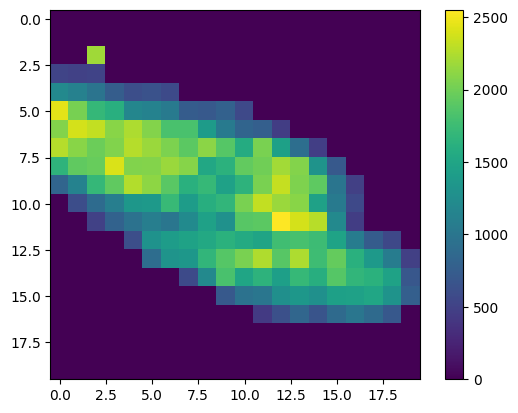

In [20]:
plt.imshow(cleaned_images[1336, 206, 1])
plt.colorbar()

In [21]:
def remove_and_replace(data, cell_index, time_index):
    """
    Remove the specified image for both channels and add a zero-only image 
    at the last time point to maintain the shape.
    
    Args:
        data (numpy.ndarray): The input data of shape (cells, time, channels, height, width).
        cell_index (int): The index of the cell to modify.
        time_index (int): The time point to remove.
        
    Returns:
        numpy.ndarray: The modified data.
    """
    # Extract shape information
    _, time_points, channels, height, width = data.shape
    new_data = data.copy()
    # Remove the specified time point
    modified_cell_data = np.delete(new_data[cell_index], time_index, axis=0)  # Shape: (1079, 2, 20, 20)

    # Create a zero-only image
    zero_image = np.zeros((1, channels, height, width))  # Shape: (1, 2, 20, 20)

    # Append the zero-only image at the last time point
    modified_cell_data = np.concatenate([modified_cell_data, zero_image], axis=0)  # Back to (1080, 2, 20, 20)

    # Assign the modified data back
    new_data[cell_index] = modified_cell_data

    return new_data


In [22]:
# the cell index and time index are found in the next step (where the channels are divided)
new_cleaned_images = remove_and_replace(cleaned_images, cell_index=1336, time_index=206)
new_cleaned_images = remove_and_replace(new_cleaned_images, cell_index=82, time_index=786)
new_cleaned_images = remove_and_replace(new_cleaned_images, cell_index=517, time_index=255)
new_cleaned_images = remove_and_replace(new_cleaned_images, cell_index=619, time_index=22)
new_cleaned_images = remove_and_replace(new_cleaned_images, cell_index=1184, time_index=167)

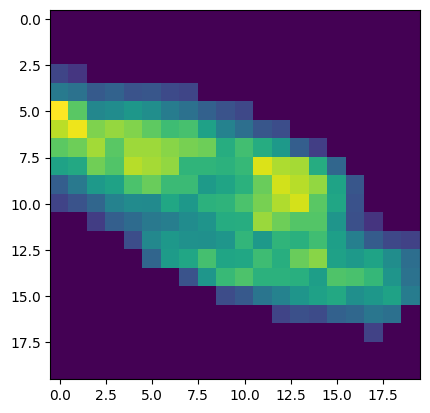

In [23]:
plt.imshow(new_cleaned_images[1336, 206, 1])

In [24]:
filtered_tracks.shape, filtered_y_train.shape, new_cleaned_images.shape

((1385, 1080, 19), (1385,), (1385, 1080, 2, 20, 20))

### SAVE FOR MANUSCRIPT NOTEBOOK

In [ ]:
np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/cleaned_images.npy", new_cleaned_images)
np.save("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/filtered_tracks.npy", filtered_tracks)
np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/filtered_y_train.npy", filtered_y_train)
np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/filtered_y_train_all_fates.npy", filtered_y_train_all_fates)

: 

## 8. Get FRET ratio 
Divide the 2 fluorescence channels. NOTE: will divide channel 1 by channel 0.

In [80]:
fret_images = new_cleaned_images[:,:,1,:,:] / new_cleaned_images[:,:,0,:,:] 
fret_images = np.nan_to_num(fret_images, nan=0.0)

/var/folders/ds/_m8m03r135b5r67hc6xgtxt00000gn/T/ipykernel_87655/3325400739.py:1: RuntimeWarning: invalid value encountered in divide
  fret_images = new_cleaned_images[:,:,1,:,:] / new_cleaned_images[:,:,0,:,:]


In [81]:
fret_images.max()

5.186147186147186

In [82]:
np.where(fret_images == fret_images.max())

(array([1338]), array([336]), array([12]), array([15]))

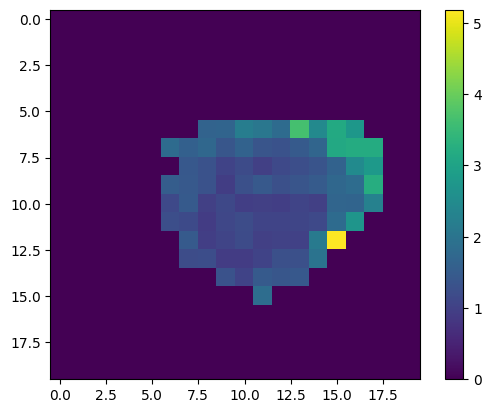

In [83]:
plt.imshow(fret_images[1338, 336])
plt.colorbar()

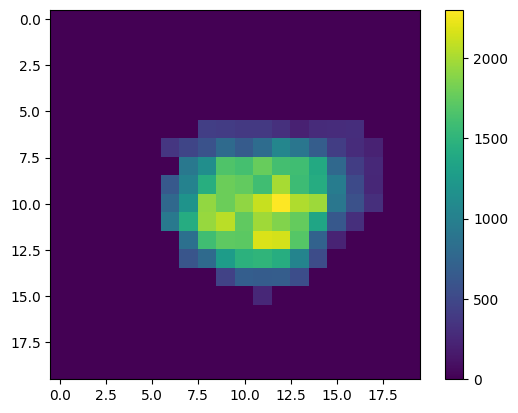

In [87]:
plt.imshow(new_cleaned_images[1338, 336, 0])
plt.colorbar()

In [25]:
import numpy as np

def find_problematic_cells_and_times(data, threshold=4):
    """
    Efficiently finds indexes of cells and time points with at least one pixel value 
    significantly higher than all other pixels in the same image.
    
    Args:
        data (numpy.ndarray): The input data of shape (cells, time, height, width).
        threshold (int): The minimum difference to consider a pixel problematic.
        
    Returns:
        list: Sorted list of tuples (cell_index, time_index) with problematic pixels.
    """
    problematic_indices = []

    # Iterate over each cell and time point
    for cell_idx in range(data.shape[0]):
        for time_idx in range(data.shape[1]):
            image = data[cell_idx, time_idx]  # Shape: (20, 20)
            
            # Flatten the image to easily exclude each pixel
            flat_image = image.flatten()
            
            # Get max value of the entire image
            max_pixel = np.max(flat_image)
            
            # Get the max value of all other pixels by excluding each pixel one by one
            for pixel_idx, pixel_value in enumerate(flat_image):
                # Mask to exclude the current pixel
                mask = np.ones(flat_image.shape, dtype=bool)
                mask[pixel_idx] = False
                
                # Maximum value among the other pixels
                max_others = np.max(flat_image[mask])
                
                # Check if the current pixel is significantly higher
                if pixel_value > (max_others + threshold):
                    problematic_indices.append((cell_idx, time_idx))
                    break  # No need to check other pixels for this image
    
    return sorted(problematic_indices)

# Example usage
problematic_cells = find_problematic_cells_and_times(fret_images)
print("Problematic cells:", problematic_cells)


Problematic cells: [(82, 786), (517, 255), (619, 22), (1184, 167)]


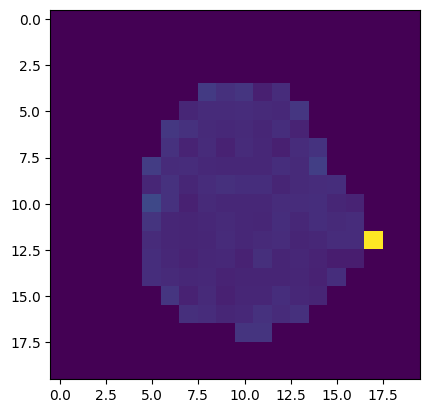

In [46]:
plt.imshow(fret_images[1184, 167])

## 9. Normalise images

In [88]:
## do it in a frame-wise way!!!

norm_images = normalize_channels(fret_images)

In [89]:
norm_images.shape

(1385, 1080, 20, 20)

## 10. Center all cells to the middle of FOV

In [91]:
centered_images = center_cells(norm_images)

In [ ]:
## save
np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/norm_images.npy", centered_images)
np.save("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/filtered_tracks.npy", filtered_tracks)
np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/filtered_y_train.npy", filtered_y_train)

## 11. Split and Augment Data

In [7]:
centered_images = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/images/norm_images.npy")
filtered_tracks = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/filtered_tracks.npy")
filtered_y_train = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/labels/filtered_y_train.npy")

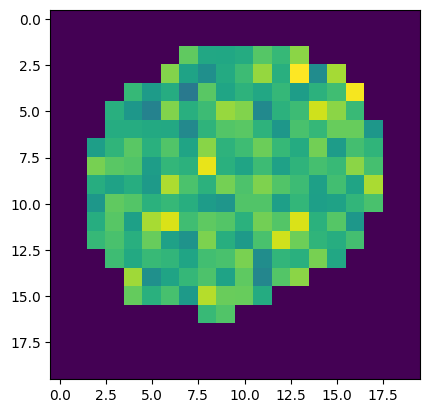

In [8]:
plt.imshow(centered_images[0,0])

In [9]:
np.where(centered_images == 1.0)

(array([1338]), array([336]), array([11]), array([13]))

In [93]:
centered_images.shape

(1385, 1080, 20, 20)

In [10]:
# train test split
from sklearn.model_selection import train_test_split

train_indexes, test_indexes = train_test_split(
        np.arange(len(filtered_y_train)),
        test_size=0.2,
        stratify=filtered_y_train,
        random_state=42
    )
    
train_images = centered_images[train_indexes]
train_labels = filtered_y_train[train_indexes]
train_tracks = filtered_tracks[train_indexes]
test_images = centered_images[test_indexes]
test_labels = filtered_y_train[test_indexes]
test_tracks = filtered_tracks[test_indexes]

In [11]:
def augment_dataset(cell_images, labels, augmentations, fate_0_label=0, fate_1_label=1):
    
    # Separate fate 0 and fate 1 in the training set
    fate_0_images = cell_images[labels == fate_0_label]
    fate_1_images = cell_images[labels == fate_1_label]
    
    # Augment both classes
    augmented_fate_0 = [augmentations(image) for image in fate_0_images]
    augmented_fate_0 = np.concatenate(augmented_fate_0, axis=0)
    
    augmented_fate_1 = [augmentations(image) for image in fate_1_images]
    augmented_fate_1 = np.concatenate(augmented_fate_1, axis=0)
    
    # Combine augmented data with originals
    fate_0_combined = np.concatenate([fate_0_images, augmented_fate_0], axis=0)
    fate_1_combined = np.concatenate([fate_1_images, augmented_fate_1], axis=0)
    
    # Balance fate 0 by random sampling
    target_count = len(fate_1_combined)
    if len(fate_0_combined) >= target_count:
        # Randomly sample without replacement if enough samples
        balanced_fate_0 = fate_0_combined[np.random.choice(
            len(fate_0_combined), size=target_count, replace=False
        )]
    else:
        # Randomly sample with replacement if not enough samples
        balanced_fate_0 = fate_0_combined[np.random.choice(
            len(fate_0_combined), size=target_count, replace=True
        )]
    
    # Combine balanced datasets
    final_images = np.concatenate([balanced_fate_0, fate_1_combined], axis=0)
    final_labels = np.array([fate_0_label] * len(balanced_fate_0) +
                                   [fate_1_label] * len(fate_1_combined))
    
    # Shuffle the training data
    shuffle_indexes = np.random.permutation(len(final_labels))
    final_images = final_images[shuffle_indexes]
    final_labels = final_labels[shuffle_indexes]
    
    return final_images, final_labels

# Example augmentation function
def augmentations(image):
    augmented = [
        np.flip(image, axis=-1),  # Flip horizontally
        np.flip(image, axis=-2),  # Flip vertically
        np.rot90(image, k=1, axes=(-2, -1)),  # Rotate 90 degrees
        np.rot90(image, k=2, axes=(-2, -1)),  # Rotate 180 degrees
        np.rot90(image, k=3, axes=(-2, -1))  # Rotate 270 degrees
    ]
    return np.array(augmented)

In [12]:
train_images_augmented, train_labels_augmented = augment_dataset(train_images, train_labels, augmentations)

In [13]:
train_images_augmented.shape

(2184, 1080, 20, 20)

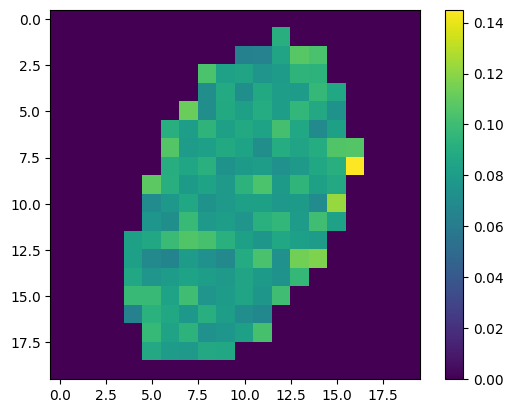

In [33]:
plt.imshow(train_images_augmented[200, 100, :, :])
plt.colorbar()

In [26]:
train_images_augmented.shape, train_labels_augmented.shape, train_tracks.shape, test_images.shape, test_labels.shape, test_tracks.shape

((2184, 1080, 20, 20),
 (2184,),
 (1108, 1080, 19),
 (277, 1080, 20, 20),
 (277,),
 (277, 1080, 19))

In [14]:
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/train_images_augmented.npy", train_images_augmented)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/train_labels_augmented.npy", train_labels_augmented)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/train_labels.npy", train_labels)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/train_tracks.npy", train_tracks)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/tracks/test_tracks.npy", test_tracks)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/test_images.npy", test_images)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/test_labels.npy", test_labels)

## INTENSITY STRETCH FOR EACH TIME FRAME -> maybe within the workflow for the SI plot

## 11. Stretch image intensities
This is done to do a scaling of the intensities in each cell, so that the minimum value is 0 (but keeping the same "relationship" between pixel values)

In [15]:
def stretch_intensities_global(train_images, test_images, epsilon=0.001):
    """
    Stretch the intensities of train_images and test_images globally using the same min and max.
    
    Args:
        train_images (ndarray): Training image data
        test_images (ndarray): Testing image data
        epsilon (float): Value to prevent division by zero

    Returns:
        scaled_train_images (ndarray): Scaled training images
        scaled_test_images (ndarray): Scaled testing images
    """
    # Combine the datasets to compute global min and max
    combined_images = np.concatenate([train_images[train_images > 0], test_images[test_images > 0]])
    
    # Compute the global min and max across both datasets
    global_min = np.min(combined_images)
    global_max = np.max(combined_images)

    # Avoid division by zero
    if global_max > global_min:
        # Apply scaling to all images
        scaled_train_images = (train_images - global_min) / (global_max - global_min)
        scaled_train_images = scaled_train_images * (1 - epsilon) + epsilon
        scaled_train_images[train_images == 0] = 0  # Preserve zero values (background)

        scaled_test_images = (test_images - global_min) / (global_max - global_min)
        scaled_test_images = scaled_test_images * (1 - epsilon) + epsilon
        scaled_test_images[test_images == 0] = 0  # Preserve zero values (background)
    else:
        # If global_max == global_min, leave unchanged
        scaled_train_images = train_images
        scaled_test_images = test_images

    return scaled_train_images, scaled_test_images


In [16]:
stretched_x_train, stretched_x_test = stretch_intensities_global(train_images_augmented, test_images)

In [17]:
stretched_x_train.shape, stretched_x_test.shape

((2184, 1080, 20, 20), (277, 1080, 20, 20))

In [19]:
stretched_x_test.max()

0.8243900072650396

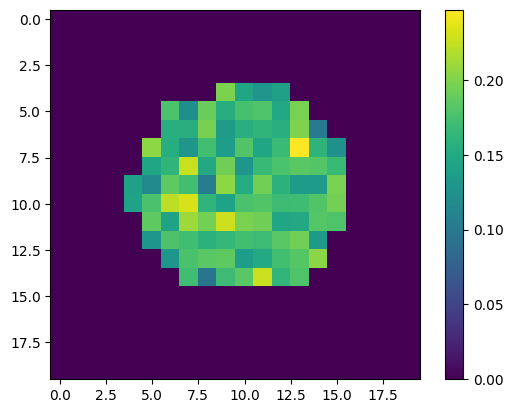

In [22]:
plt.imshow(stretched_x_train[20, 10, :, :])
plt.colorbar()

In [56]:
stretched_x_train[stretched_x_train!=0.0][:100]

array([0.09273428, 0.08984665, 0.07582113, 0.10294916, 0.08544458,
       0.07291112, 0.1032596 , 0.10210094, 0.0592778 , 0.08714035,
       0.08541437, 0.07357708, 0.09180081, 0.07553258, 0.08315418,
       0.0873313 , 0.07860689, 0.0879439 , 0.0954667 , 0.06895833,
       0.07282337, 0.06273195, 0.08614772, 0.0944456 , 0.07202766,
       0.11361097, 0.07977478, 0.10257809, 0.08781135, 0.06072965,
       0.07204423, 0.06331436, 0.08822416, 0.08875155, 0.06816959,
       0.13017357, 0.10030664, 0.0745978 , 0.077139  , 0.06462749,
       0.10422609, 0.10871284, 0.10237226, 0.07711977, 0.10166223,
       0.07677126, 0.07913068, 0.07747462, 0.08826834, 0.06461131,
       0.08579943, 0.08883293, 0.10353912, 0.08945645, 0.09793303,
       0.07869489, 0.08188816, 0.06599482, 0.07798155, 0.06357144,
       0.05733285, 0.08257542, 0.07488355, 0.08436434, 0.0693234 ,
       0.06132984, 0.07639023, 0.07932213, 0.08215685, 0.08832872,
       0.0841696 , 0.07992709, 0.09004404, 0.08106583, 0.06701

In [57]:
np.where(stretched_x_train==1.0)

(array([1463]), array([206]), array([2]), array([2]))

In [80]:
np.where(train_images==1.0)

(array([407]), array([206]), array([2]), array([2]))

In [76]:
train_images.shape

(1108, 1080, 20, 20)

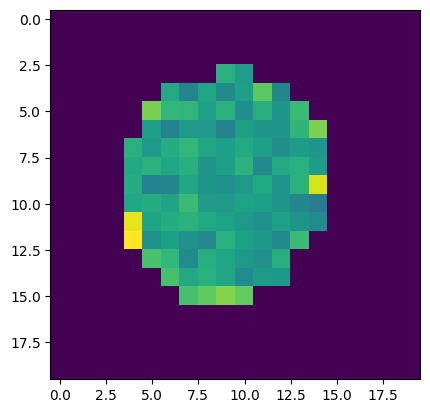

In [94]:
plt.imshow(train_images[406, 206])

In [95]:
train_tracks[406, 200:210, 15]

array([112., 109., 109., 111., 110., 109., 112., 112., 110., 114.],
      dtype=float32)

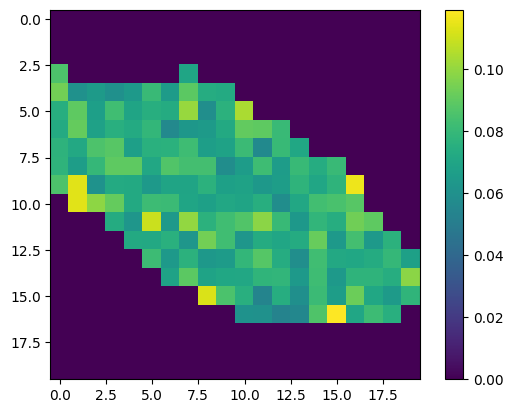

In [65]:
plt.imshow(stretched_x_train[1463, 209, :, :])
plt.colorbar()

In [50]:
previous_stretched_x_test = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/stretched_x_test.npy")

In [51]:
previous_stretched_x_test.max()

0.8596905079691756

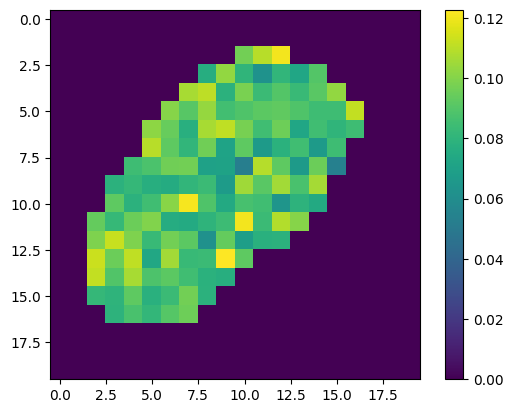

In [52]:
plt.imshow(stretched_x_test[10, 10, :, :])
plt.colorbar()

## Optional: Balance test set for visualisation

In [29]:
test_images_augmented, test_labels_augmented = augment_dataset(test_images, test_labels, augmentations)

In [48]:
stretch_x_train = np.load("/Users/inescunha/Documents/GitHub/CellFate/data/images/stretched_x_train.npy")

In [49]:
stretch_x_train.shape

(2184, 20, 20)

In [47]:
test_labels_augmented.shape

(552,)

In [42]:
# for FRAME 0:

stretched_x_train, stretched_x_test_augmented = stretch_intensities_global(train_images_augmented[:,0,:,:], test_images_augmented[:,0,:,:])

In [44]:
# for FRAME 0:
stretched_x_train, stretched_x_test = stretch_intensities_global(train_images_augmented[:,0,:,:], test_images[:,0,:,:])

In [45]:
stretched_x_train.shape, stretched_x_test_augmented.shape, stretched_x_test.shape

((2184, 20, 20), (552, 20, 20), (277, 20, 20))

In [46]:
np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/stretched_x_train.npy", stretched_x_train)
np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/stretched_x_test.npy", stretched_x_test)
np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/stretched_x_test_augmented.npy", stretched_x_test_augmented)

In [39]:
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/images/test_images_augmented.npy", test_images_augmented)
# np.save("/Users/inescunha/Documents/GitHub/CellFate/data/labels/test_labels_augmented.npy", test_labels_augmented)

# Random things

In [81]:
import numpy as np

# Assuming br3_mother_tracks and br3_y_train are already defined
fate_matrix = br3_mother_tracks[br3_mother_tracks[:,0,-1] == 3][:, :, -1]

# Find the first zero in each row
first_zero_indices = np.apply_along_axis(lambda row: np.argmax(row == 0) if np.any(row == 0) else -1, axis=1, arr=fate_matrix)

# Print the results
print("First zero indices for each row:")
print(first_zero_indices)


First zero indices for each row:
[ 532  464  322  189  379  577  554  601  969  426  546  840 1003  257
  878  518  713  467  579  606  522 1038 1070  180 1027  730  201  548
  344  606]


In [91]:
br1_mother_tracks[br1_y_train == 2].shape

(34, 1080, 10)

In [113]:
import numpy as np

def daugther_trace_removal(matrix):
    """
    For each cell (row) in the matrix, sets all values in all columns to zero 
    starting from the first zero in the 4th column (index 3).
    
    Args:
        matrix (numpy.ndarray): A 3D matrix of shape (cells, time, features).
        
    Returns:
        numpy.ndarray: Processed matrix with zeroed values from the first zero onward in the 4th column.
    """
    processed_matrix = matrix.copy()
    
    for cell_idx, cell in enumerate(processed_matrix):
        # Find the first zero in the 4th column
        first_zero_index = np.argmax(cell[:, 4] == 0) if np.any(cell[:, 4] == 0) else None
        
        # If a zero is found, set all values from that time point onward to zero
        if first_zero_index is not None:
            processed_matrix[cell_idx, first_zero_index:, :] = 0
    
    return processed_matrix

# Apply the function to the subset of the tracks
processed_br1_mother_tracks = daugther_trace_removal(br1_mother_tracks[br1_y_train == 2])

# Confirm the changes
print("Processed matrix shape:", processed_br1_mother_tracks.shape)


Processed matrix shape: (34, 1080, 10)


In [95]:
br1_mother_tracks[br1_y_train == 2][0,:,4][400:600]

array([1.0736096 , 1.055149  , 1.0905303 , 1.092127  , 1.0840935 ,
       1.0563608 , 1.0748883 , 1.0784637 , 1.0592111 , 1.046493  ,
       1.0360446 , 1.0512099 , 1.0363867 , 1.0667735 , 1.0261283 ,
       1.0341673 , 1.0197878 , 1.0158173 , 1.0193248 , 1.0104283 ,
       1.0097171 , 1.024575  , 1.0256407 , 1.0282562 , 1.0327061 ,
       1.0610956 , 1.0475533 , 1.0657954 , 1.0290425 , 1.0522226 ,
       1.0696201 , 1.0079278 , 1.0109152 , 1.0460668 , 1.0738034 ,
       1.038976  , 1.0237169 , 1.0068738 , 1.0322778 , 1.0143622 ,
       1.0208637 , 1.0555756 , 1.0425649 , 0.99591243, 1.0021855 ,
       1.0171853 , 1.0021807 , 1.0263573 , 0.9973811 , 0.9966945 ,
       1.0046283 , 1.0317597 , 1.0341554 , 1.0858612 , 1.072814  ,
       1.1046714 , 1.0886966 , 1.064392  , 1.0410048 , 1.0520434 ,
       1.0210351 , 0.98632115, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [121]:
daugther_trace_removal(br1_mother_tracks[br1_y_train == 2])[10]

array([[206.       , 191.62418  , 169.35526  , ...,   1.2271907,
        988.       ,   2.       ],
       [206.       , 192.09357  , 168.99722  , ...,   1.1654947,
        988.       ,   2.       ],
       [206.       , 191.67625  , 169.0062   , ...,   1.1755966,
        988.       ,   2.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]], dtype=float32)

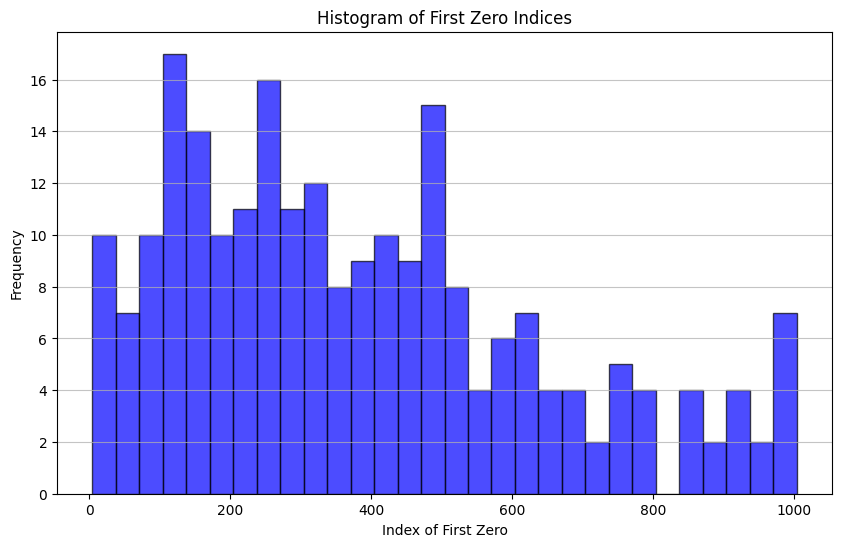

In [128]:
# Extract the matrices
matrix_br1_2 = daugther_trace_removal(br1_mother_tracks[br1_y_train == 2])[:, :, -1]
matrix_br1_3 = daugther_trace_removal(br1_mother_tracks[br1_y_train == 3])[:, :, -1]
matrix_br2_2 = daugther_trace_removal(br2_mother_tracks[br2_y_train == 2])[:, :, -1]
matrix_br2_3 = daugther_trace_removal(br2_mother_tracks[br2_y_train == 3])[:, :, -1]
matrix_br3_2 = daugther_trace_removal(br3_mother_tracks[br3_y_train == 2])[:, :, -1]
matrix_br3_3 = daugther_trace_removal(br3_mother_tracks[br3_y_train == 3])[:, :, -1]

# Function to find the first zero indices in each row
def find_first_zero_indices(matrix):
    return np.apply_along_axis(lambda row: np.argmax(row == 0) if np.any(row == 0) else -1, axis=1, arr=matrix)

# Find first zero indices for both matrices
first_zero_indices_br1_2 = find_first_zero_indices(matrix_br1_2)
first_zero_indices_br1_3 = find_first_zero_indices(matrix_br1_3)
first_zero_indices_br2_2 = find_first_zero_indices(matrix_br2_2)
first_zero_indices_br2_3 = find_first_zero_indices(matrix_br2_3)
first_zero_indices_br3_2 = find_first_zero_indices(matrix_br3_2)
first_zero_indices_br3_3 = find_first_zero_indices(matrix_br3_3)

# Combine the indices from both groups
combined_first_zero_indices = np.concatenate([first_zero_indices_br1_2, first_zero_indices_br1_3, first_zero_indices_br2_2, first_zero_indices_br2_3, first_zero_indices_br3_2, first_zero_indices_br3_3])

# Filter out the values where fret is always NaN (TODO: CHECK LATER WHICH ONES THEY ARE)
filtered_indices = combined_first_zero_indices[combined_first_zero_indices != 0]

# Filter out -1 values (rows with no zeros)
valid_indices = filtered_indices[filtered_indices != -1]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(valid_indices, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of First Zero Indices')
plt.xlabel('Index of First Zero')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
combined_first_zero_indices[np.any(combined_first_zero_indices[:, 0] != 0, axis=1)]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [126]:
combined_first_zero_indices

array([ 462,  190,  635,  288,    0,  500,  312,  160,  225,    0,  912,
        380,  404,  371,    0,  616,  473,  719,    0,  157,  196,   29,
        473,  267,  223,  179,    0,    0,  419,  581,  485,  215,  152,
        245,  499,  186,  862,  390,  142,  146,  267,  375,    0,  176,
         89,    0,  840,  586,  306,  307,   68,  252,    0,  865,  134,
          0,    0,   73,  145,    0,  314,  127,  204,  208,  103,    0,
        250,  416,  497,  566,  685,  785,  112,    0,  688,   16,  219,
        593,  257,   11,   42,  973,  321,  307,  787,  522,  363,  254,
         34,   37,  326,  131,  579,  263,  391,  166,    0,  272,  762,
        951,  248,  511,  760,  312,  350,  380,  694,   84,  471,  292,
        555,  296,  935,  206,   71,    0,  352,  137,  975,  347,  240,
        297,    0,   23,    0,  425,  253,  224,  604,  637,  466,  445,
        485,  138,  461,  140,  306,   71,  581,  473,  650,  113,  519,
         44,  979,  312,  426,  562,  396,  906, 10

In [80]:
br3_mother_tracks[br3_mother_tracks[:,0,-1] == 2][-21]

array([[1.6460000e+03, 1.8505713e+02, 2.2397194e+02, ..., 1.2351209e+00,
        8.3900000e+02, 2.0000000e+00],
       [1.6460000e+03, 1.8481119e+02, 2.2382285e+02, ..., 1.2118138e+00,
        8.3900000e+02, 2.0000000e+00],
       [1.6460000e+03, 1.8491660e+02, 2.2385893e+02, ..., 1.1923810e+00,
        8.3900000e+02, 2.0000000e+00],
       ...,
       [1.6460000e+03, 1.7720670e+02, 2.3622452e+02, ..., 1.5645307e+00,
        8.3900000e+02, 2.0000000e+00],
       [1.6460000e+03, 1.7727531e+02, 2.3627551e+02, ..., 1.5824816e+00,
        8.3900000e+02, 2.0000000e+00],
       [1.6460000e+03, 1.7739049e+02, 2.3631149e+02, ..., 1.5859095e+00,
        8.3900000e+02, 2.0000000e+00]], dtype=float32)

In [ ]:
np.nonzero(br3_mother_tracks[br3_y_train==2][:,:,-1])

(array([ 0,  0,  0, ..., 83, 83, 83]),
 array([   0,    1,    2, ..., 1064, 1065, 1066]))

## Centering cells better

In [4]:
import numpy as np

x_train = np.load('/Users/inescunha/Documents/GitHub/CellFate/data/stretched_x_train.npy')
#y_train = np.load('../data/train_labels.npy')
x_test = np.load('/Users/inescunha/Documents/GitHub/CellFate/data/stretched_x_test.npy')
#y_test = np.load('../data/test_labels.npy')

In [5]:
def center_cells(images):
    """
    Centers each cell in the middle of a 20x20 field-of-view.
    
    Args:
        images: NumPy array of shape (num_cells, 20, 20), where each cell is a binary or intensity image.

    Returns:
        Centered images of the same shape (num_cells, 20, 20).
    """
    num_cells, height, width = images.shape
    centered_images = np.zeros_like(images)

    for i in range(num_cells):
        img = images[i]

        # Find nonzero pixel indices
        y_indices, x_indices = np.where(img > 0)
        if len(y_indices) == 0 or len(x_indices) == 0:
            continue  # Skip empty images
        
        # Get bounding box
        y_min, y_max = y_indices.min(), y_indices.max()
        x_min, x_max = x_indices.min(), x_indices.max()
        
        # Extract the cell
        cropped_cell = img[y_min:y_max+1, x_min:x_max+1]

        # Compute new position to center the cropped cell
        new_y_start = (height - cropped_cell.shape[0]) // 2
        new_x_start = (width - cropped_cell.shape[1]) // 2
        
        # Place cropped cell into the new centered array
        centered_images[i, new_y_start:new_y_start+cropped_cell.shape[0], 
                            new_x_start:new_x_start+cropped_cell.shape[1]] = cropped_cell

    return centered_images


In [6]:
centered_x_train = center_cells(x_train)

In [16]:
centered_x_test = center_cells(x_test)

In [20]:
np.save("/Users/inescunha/Documents/GitHub/CellFate/data/centered_x_train.npy", centered_x_train)
np.save("/Users/inescunha/Documents/GitHub/CellFate/data/centered_x_test.npy", centered_x_test)

In [7]:
centered_x_train.shape

(2184, 20, 20)

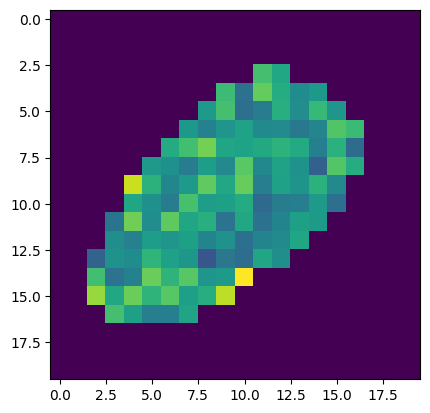

In [19]:
plt.imshow(centered_x_test[10])

In [ ]:
# to add: balance test set for visualisation